In [15]:
#Used libraries
import csv
import re
import os
from brian2 import *
import numpy as np
from scipy.interpolate import interp1d
import brian2.numpy_ as np
import matplotlib.pyplot as plt
import time
import warnings
from scipy import interpolate
from keras.datasets import mnist
from tqdm import tqdm
import random
import pickle
from random import shuffle
import seaborn as sn
import pandas as pd
import pickle
from matplotlib import rc
import matplotlib
import matplotlib.patches as mpatches



## Loading the weight from trained eSNNs

In [16]:

## Scenario 3
folder = '../data_backup/without_noise_final/example_analogSNN_trained'
with open(f'{folder}/weightfile_exci', 'rb') as file:
    weight_exci_noiseless = pickle.load(file)
with open(f'{folder}/weightfile_inhi', 'rb') as file:
    weight_inhi_noiseless = pickle.load(file)
with open(f'{folder}/weightfile_wta', 'rb') as file:
    weight_wta_noiseless = pickle.load(file)
with open(f'{folder}/labelfile', 'rb') as file:
    labeled_neurons_noiseless = pickle.load(file)
    


## Scenario 1
folder = '../data_backup/cst_noise_final/example_analogSNN_trained'
with open(f'{folder}/weightfile_exci', 'rb') as file:
    weight_exci_noise1 = pickle.load(file)
with open(f'{folder}/weightfile_inhi', 'rb') as file:
    weight_inhi_noise1 = pickle.load(file)
with open(f'{folder}/weightfile_wta', 'rb') as file:
    weight_wta_noise1 = pickle.load(file)
with open(f'{folder}/labelfile', 'rb') as file:
    labeled_neurons_noise1 = pickle.load(file)
    
# Scenario 2
folder = '../data_backup/analog_noise_final/example_analogSNN_trained'
with open(f'{folder}/weightfile_exci6', 'rb') as file:
    weight_exci_noise2 = pickle.load(file)
with open(f'{folder}/weightfile_inhi6', 'rb') as file:
    weight_inhi_noise2 = pickle.load(file)
with open(f'{folder}/weightfile_wta6', 'rb') as file:
    weight_wta_noise2 = pickle.load(file)
with open(f'{folder}/labelfile6', 'rb') as file:
    labeled_neurons_noise2 = pickle.load(file)


weight_exci_noiseless = weight_exci_noiseless.T
weight_inhi_noiseless = weight_inhi_noiseless.T

weight_exci_noise1 = weight_exci_noise1.T
weight_inhi_noise1 = weight_inhi_noise1.T

weight_exci_noise2 = weight_exci_noise2.T
weight_inhi_noise2 = weight_inhi_noise2.T


random_idx_weight = np.random.choice(range(weight_exci_noiseless.shape[1] -1), 100 , replace=False)

## Display the post-training weights

The i-th row represents ten neurons labeled as the digit 'i'. This means that the neurons in row i are most active when the input is a digit 'i'. If there are not ten neurons labeled as 'i', the row is completed with null matrices.

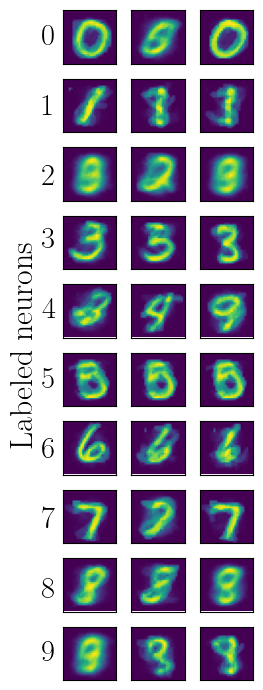

In [17]:
weight_sorted = [[],[],[],[],[],[],[],[],[],[]]

#print(" n_output = ", labeled_neurons.shape[0], type(labeled_neurons.shape[0]))

for i_digits in range(10):
    nb_save = 0
    for j in range(labeled_neurons_noiseless.shape[0]):
        if labeled_neurons_noiseless[j] == i_digits and nb_save <= 10:
            weight_sorted[i_digits].append(weight_exci_noiseless[j])
            nb_save += 1
            #print(f" len weight_sorted[{i_digits}] = ", len(weight_sorted[i_digits]))
        if nb_save >10:
            break
        if j >= labeled_neurons_noiseless.shape[0] -1 and nb_save <10:
            while len(weight_sorted[i_digits]) < 10:
                weight_sorted[i_digits].append(np.zeros((784,1)))
        
rc('font', family='serif')
rc('font', serif='Times New Roman')
rc('text', usetex=True)

plt.figure(figsize=(7,7))
for i in range(10):
    for j in range(3):
        ax = plt.subplot2grid((10,10),(i,j))
        ax.imshow(weight_sorted[i][j].reshape(28, 28), cmap='viridis')
        plt.xticks([])
        plt.yticks([])
        #ax.text(15, 32, f'{labeled_neurons[random_idx_weight[i*10+j]]}', ha='center', va='center', fontsize=2, color='black', fontweight='bold', zorder=10)


plt.figtext(-0.054, 0.5, '  Labeled neurons  \n   ', va='center', rotation='vertical', fontsize=23)
plt.figtext(-0.009, 0.06, '9', va='center', fontsize=22)
plt.figtext(-0.009, 0.15, '8', va='center', fontsize=22)
plt.figtext(-0.009, 0.25, '7', va='center', fontsize=22)
plt.figtext(-0.009, 0.35, '6', va='center', fontsize=22)
plt.figtext(-0.009, 0.45, '5', va='center', fontsize=22)
plt.figtext(-0.009, 0.55, '4', va='center', fontsize=22)
plt.figtext(-0.009, 0.65, '3', va='center', fontsize=22)
plt.figtext(-0.009, 0.74, '2', va='center', fontsize=22)
plt.figtext(-0.009, 0.84, '1', va='center', fontsize=22)
plt.figtext(-0.009, 0.94, '0', va='center', fontsize=22)
#plt.figtext(0.5, 1, f"(a)     Accuracy without noise = 0.63/1    \n   Accuracy with noise added post-training = 0.47/1 ", ha='center', fontsize=21)

plt.tight_layout()  
plt.savefig("../results/weight_noiseless.svg", bbox_inches='tight')
plt.show()
plt.close()   

#### Same with eSNN trained with noisy neurons (scenario 1)

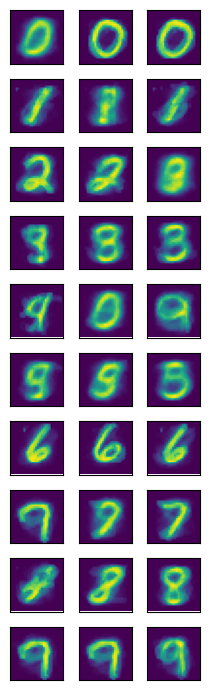

In [18]:
weight_sorted = [[],[],[],[],[],[],[],[],[],[]]

for i_digits in range(10):
    nb_save = 0
    for j in range(labeled_neurons_noise1.shape[0]):
        if labeled_neurons_noise1[j] == i_digits and nb_save <= 10:
            weight_sorted[i_digits].append(weight_exci_noise1[j])
            nb_save += 1
            #print(f" len weight_sorted[{i_digits}] = ", len(weight_sorted[i_digits]))
        if nb_save >10:
            break
        if j >= 1224 and nb_save <10:
            while len(weight_sorted[i_digits]) < 10:
                weight_sorted[i_digits].append(np.zeros((784,1)))
        

        
rc('font', family='serif')
rc('font', serif='Times New Roman')
rc('text', usetex=True)

plt.figure(figsize=(7,7))
for i in range(10):
    for j in range(3):
        ax = plt.subplot2grid((10,10),(i,j))
        ax.imshow(weight_sorted[i][j].reshape(28, 28), cmap='viridis')
        plt.xticks([])
        plt.yticks([])    
        #ax.text(15, 32, f'{labeled_neurons[random_idx_weight[i*10+j]]}', ha='center', va='center', fontsize=2, color='black', fontweight='bold', zorder=10)


#plt.figtext(0.5, 1, '(a)     Accuracy with noise = 0.27/1       \n     ', ha='center', fontsize=21)

plt.tight_layout()  
plt.savefig("../results/weight_noise1.svg", bbox_inches='tight')
plt.show()
plt.close()   

#### Same with SNN trained with noisy neurons (scenario 2)

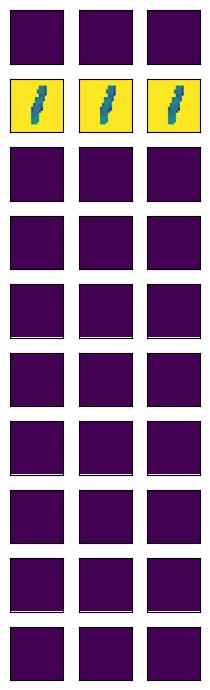

In [19]:
weight_sorted = [[],[],[],[],[],[],[],[],[],[]]

for i_digits in range(10):
    nb_save = 0
    for j in range(labeled_neurons_noise2.shape[0]):
        if labeled_neurons_noise2[j] == i_digits and nb_save <= 10:
            weight_sorted[i_digits].append(weight_exci_noise2[j])
            nb_save += 1
            #print(f" len weight_sorted[{i_digits}] = ", len(weight_sorted[i_digits]))
        if nb_save >10:
            break
        if j >= 1224 and nb_save <10:
            while len(weight_sorted[i_digits]) < 10:
                weight_sorted[i_digits].append(np.zeros((784,1)))
        

        
rc('font', family='serif')
rc('font', serif='Times New Roman')
rc('text', usetex=True)

plt.figure(figsize=(7,7))
for i in range(10):
    for j in range(3):
        ax = plt.subplot2grid((10,10),(i,j))
        ax.imshow(weight_sorted[i][j].reshape(28, 28), cmap='viridis')
        plt.xticks([])
        plt.yticks([])    
        #ax.text(15, 32, f'{labeled_neurons[random_idx_weight[i*10+j]]}', ha='center', va='center', fontsize=2, color='black', fontweight='bold', zorder=10)



#plt.figtext(0.5, 1, '(a)     Accuracy with noise = 0.27/1       \n     ', ha='center', fontsize=21)

plt.tight_layout()  
plt.savefig("../results/weight_noise2.svg", bbox_inches='tight')
plt.show()
plt.close()   

### Number of labeled neurons according to their labelisation

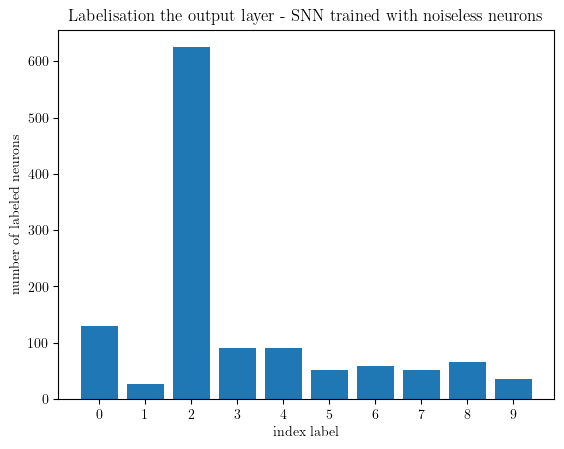

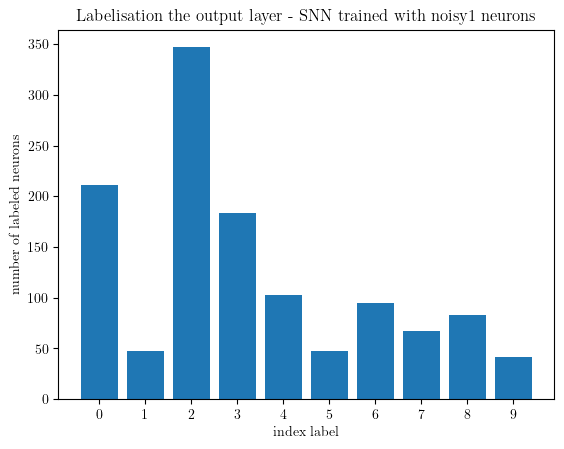

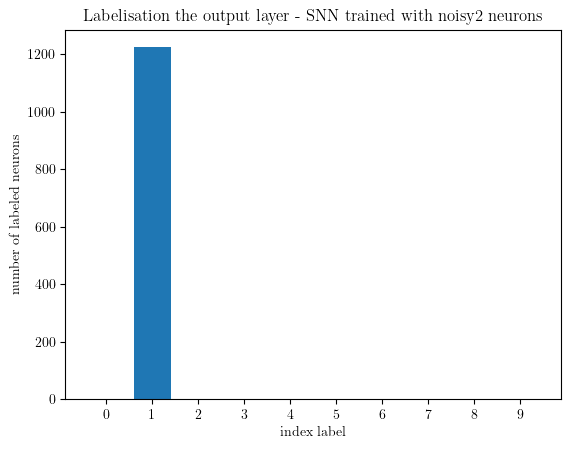

In [20]:
plt.figure()
redundancy_neuron_noiseless = np.bincount(labeled_neurons_noiseless, minlength=4)
bar(range(len(redundancy_neuron_noiseless)),redundancy_neuron_noiseless)
xticks(range(len(redundancy_neuron_noiseless)))
plt.xlabel('index label')
plt.ylabel('number of labeled neurons')
plt.title(" Labelisation the output layer - SNN trained with noiseless neurons ")
plt.show()

plt.figure()
redundancy_neuron_noise1 = np.bincount(labeled_neurons_noise1, minlength=4)
bar(range(len(redundancy_neuron_noise1)),redundancy_neuron_noise1)
xticks(range(len(redundancy_neuron_noise1)))
plt.xlabel('index label')
plt.ylabel('number of labeled neurons')
plt.title(" Labelisation the output layer - SNN trained with noisy1 neurons ")
plt.show()


plt.figure()
redundancy_neuron_noise2 = np.bincount(labeled_neurons_noise2, minlength=10)
bar(range(len(redundancy_neuron_noise2)),redundancy_neuron_noise2)
xticks(range(len(redundancy_neuron_noise2)))
plt.xlabel('index label')
plt.ylabel('number of labeled neurons')
plt.title(" Labelisation the output layer - SNN trained with noisy2 neurons ")
plt.show()

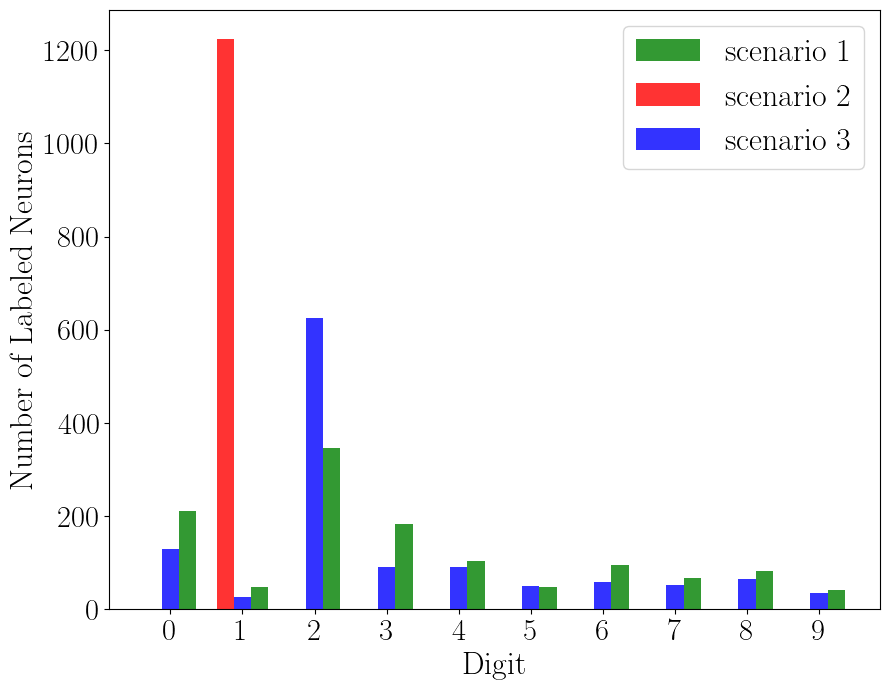

In [21]:
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = ['Times New Roman']
rc('text', usetex=True)

plt.figure(figsize=(9, 7))

width = 0.24
# Plot the bar charts
plt.bar([x+width for x in range(len(redundancy_neuron_noise1))], redundancy_neuron_noise1, width=width,color='green', alpha=0.8, label='scenario 1')
plt.bar([x-width for x in range(len(redundancy_neuron_noise2))], redundancy_neuron_noise2, width=width,color='red', alpha=0.8, label='scenario 2')
plt.bar(range(len(redundancy_neuron_noiseless)), redundancy_neuron_noiseless, width=width,color='blue', alpha=0.8, label='scenario 3')

# Set xticks to be in the middle of grouped bars
plt.xticks([x for x in range(len(redundancy_neuron_noiseless))], range(len(redundancy_neuron_noiseless)),fontsize=22)
plt.yticks(fontsize=22)

# Add labels and title
plt.xlabel(' Digit',fontsize=23)
plt.ylabel(' Number of Labeled Neurons ',fontsize=23)
#plt.title('Labelisation of the Output Layer - SNN',fontsize=22)
plt.legend(fontsize=23)
plt.tight_layout()
plt.savefig("../results/barchart_labeled_neurons.svg", bbox_inches='tight')
plt.savefig('../results/barchart_labeled_neurons.pdf', format='pdf', bbox_inches='tight',dpi=300)
plt.show()